# Sentiment analysis on Amazon Reviews

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

from nltk.corpus import stopwords
stop_words =stopwords.words('english')

from wordcloud import WordCloud

In [2]:
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Udaykiran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Udaykiran\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Udaykiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Udaykiran\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Udaykiran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Udaykiran\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagg

True

The items you're downloading using nltk.download in the Natural Language Toolkit (NLTK) are  individual datasets, lexicons, and models that NLTK uses for various natural language processing (NLP) tasks. Here's a brief explanation of each:

**vader_lexicon:** 

*Description:* The VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon is used for sentiment analysis. It includes a list of lexical features (words) with their corresponding sentiment intensity scores.
*Use Case:* Sentiment analysis, determining the polarity of text (positive, negative, neutral).
words:

**words:**
*Description:* This is a corpus containing a list of English words. It includes common words, names, and words from various domains.
*Use Case:* Spell checking, word validation, and NLP tasks that require a comprehensive list of English words.

**stopwords:**
*Description:* A collection of common stopwords in various languages. Stopwords are words that are typically filtered out in text processing because they are very frequent and usually don't carry significant meaning (e.g., "the", "is", "in").
*Use Case:* Text preprocessing, removing common but uninformative words before further analysis.

**maxent_ne_chunker:**
*Description:* The maximum entropy named entity chunker. It is used for recognizing named entities (e.g., people, organizations, locations) in text by chunking sequences of words.
*Use Case:* Named entity recognition (NER), extracting proper nouns from text.

**punkt:**
*Description:* A sentence tokenizer that divides a text into a list of sentences. It uses an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
*Use Case:* Sentence segmentation, preparing text for further processing by splitting it into sentences.

**averaged_perceptron_tagger:**
*Description:* A part-of-speech (POS) tagger that uses the averaged perceptron algorithm. It tags each word in a text with its corresponding part of speech (e.g., noun, verb, adjective).
*Use Case:* Part-of-speech tagging, syntactic analysis of text.

### Data Importing and analysis


**Reading CSV file using pandas**

In [3]:
df = pd.read_csv('foodReviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


- **DataFrame.head(n)** it used to show the top *n* items in the DataFrame and **df.tail(n)** is for the last *n* items in it

In [4]:
df = df.head(1000)
df.shape

(1000, 10)

In [5]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

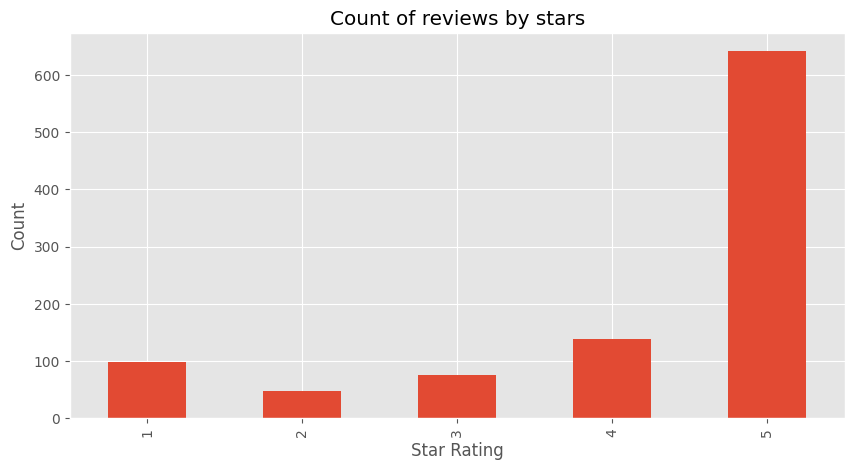

In [6]:
ax = df['Score'].value_counts().sort_index()\
.plot(kind ='bar',title ='Count of reviews by stars', figsize = (10,5))

ax.set_xlabel('Star Rating')
ax.set_ylabel('Count')
plt.show

In [7]:
example = df['Text'][49]
print(example)

This is the same stuff you can buy at the big box stores.  There is nothing healthy about it.  It is just carbs and sugars.  Save your money and get something that at least has some taste.


In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'is', 'the', 'same', 'stuff', 'you', 'can', 'buy', 'at', 'the']

In [9]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('stuff', 'NN'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('buy', 'VB'),
 ('at', 'IN'),
 ('the', 'DT')]

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  the/DT
  same/JJ
  stuff/NN
  you/PRP
  can/MD
  buy/VB
  at/IN
  the/DT
  big/JJ
  box/NN
  stores/NNS
  ./.
  There/EX
  is/VBZ
  nothing/NN
  healthy/JJ
  about/IN
  it/PRP
  ./.
  It/PRP
  is/VBZ
  just/RB
  carbs/JJ
  and/CC
  sugars/NNS
  ./.
  Save/VB
  your/PRP$
  money/NN
  and/CC
  get/VB
  something/NN
  that/WDT
  at/IN
  least/JJS
  has/VBZ
  some/DT
  taste/NN
  ./.)


#### sentiment analysis

In [11]:
sia = SentimentIntensityAnalyzer()

In [12]:
res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
    text= row['Text']
    myid= row['Id']
    res[myid]= sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df,how='left')

In [14]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Visualization

Text(0.5, 1.0, 'Compound Scores for Amazon Reviews')

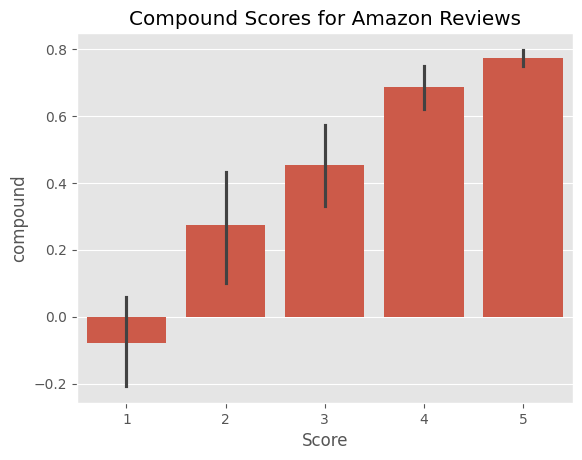

In [15]:
ax = sns.barplot(data = vaders , x= 'Score',y='compound')
ax.set_title('Compound Scores for Amazon Reviews')

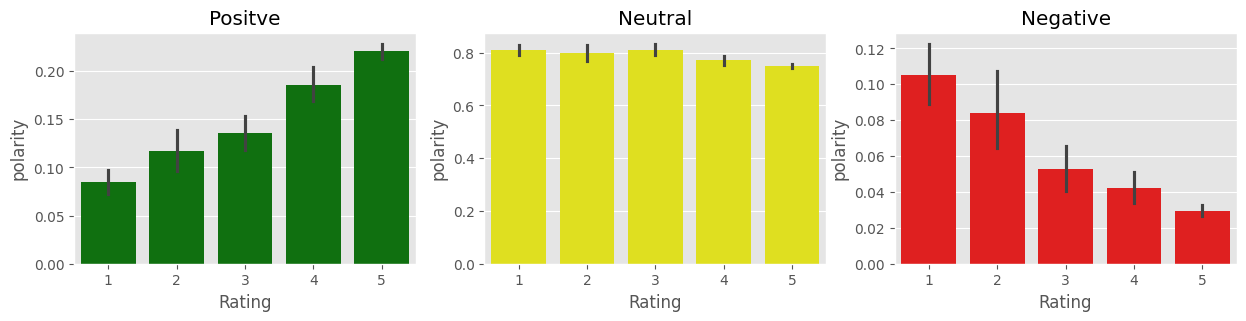

In [16]:
fig,axs = plt.subplots(1,3,figsize = (15,3))

sns.barplot(data = vaders,x ='Score',y='pos' , ax=axs[0],color='green')
sns.barplot(data = vaders,x='Score',y='neu',ax = axs[1],color='yellow')
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2],color='red')

axs[0].set_title('Positve')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('polarity')

axs[1].set_title('Neutral')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('polarity')

axs[2].set_title('Negative')
axs[2].set_xlabel('Rating')
axs[2].set_ylabel('polarity')

plt.show()

*The unique product ids*

In [17]:
unique_id = df['ProductId'].unique()
len(unique_id)

207

In [18]:
df['ProductId'].value_counts().sort_values(ascending=False)


ProductId
B000G6RYNE    217
B000G6MBX2     52
B000ER6YO0     49
B002BCD2OG     20
B000HDMUQ2     20
             ... 
B0067R3Q9M      1
B001EO5TPM      1
B0001PB9FY      1
B00144C10S      1
B001E4KFG0      1
Name: count, Length: 207, dtype: int64

### analysis on the most reviewed product 

In [19]:
product1_df = df.loc[df['ProductId']=='B000G6RYNE']
product1_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
422,423,B000G6RYNE,A2NO1TXXS9T0EE,BruteNStones,0,0,4,1335398400,Hard,"Great if you are cutting back on fat, they do ..."
423,424,B000G6RYNE,A1IRN1M05TPOVT,"Sharon M. Helfand ""Scrapper""",0,0,5,1334620800,Kettle potato chips: Fully loaded baked potato,I have never met a Kettle brand chip I did not...
424,425,B000G6RYNE,ARONI7W0W677H,Peter N,0,0,5,1334275200,"Fresh, Lightly-Spiced, Crunchy Kettle Chips. G...",After buying bags one at a time (at a hefty ma...
425,426,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
426,427,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,"pretty good, could be better",Glad to find these in a one ounce size but the...
...,...,...,...,...,...,...,...,...,...,...
634,635,B000G6RYNE,A28870VSBU9LDQ,Brian Bean,0,0,3,1344902400,Ok but Miss Vickie's Are Better,Miss Vickies are better but unfortunately less...
635,636,B000G6RYNE,A2Y0FKOY6WE0NQ,Meg,0,0,3,1338163200,"Do they have to ""bite back""?",I want to like Kettle because they contain no ...
636,637,B000G6RYNE,ACJW2YSBG2HA1,i am me,0,0,4,1336694400,These chips are awesome if not best but....,I think these chips are awesome if not the bes...
637,638,B000G6RYNE,A1J5HHOPXZ6UNF,Chris,0,0,4,1336608000,kettle chips,"This kettle chips taste ""Good , Crispy & Crunc..."


In [20]:
product1_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,217.000000,217.000000,217.000000,217.000000,2.170000e+02
mean,531.000000,1.465438,2.211982,4.013825,1.263958e+09
std,62.786676,3.718068,4.452553,1.415782,5.228407e+07
min,423.000000,0.000000,0.000000,1.000000,1.173312e+09
25%,477.000000,0.000000,0.000000,3.000000,1.215475e+09
50%,531.000000,1.000000,1.000000,5.000000,1.257034e+09
75%,585.000000,1.000000,3.000000,5.000000,1.315699e+09
max,639.000000,43.000000,47.000000,5.000000,1.350346e+09


In [21]:
word_tokens_product1=[]
for summary in product1_df['Summary']:
    tokens = nltk.word_tokenize(summary)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
    word_tokens_product1.append(filtered_tokens)

word_tokens_product1

[['Hard'],
 ['Kettle', 'potato', 'chips', 'Fully', 'loaded', 'baked', 'potato'],
 ['Fresh', 'Crunchy', 'Kettle', 'Chips', 'Good', 'Value', 'Good', 'Product'],
 ['glad', 'find', '1', 'oz', 'size'],
 ['pretty', 'good', 'could', 'better'],
 ['slight', 'taste', 'jalapeno'],
 ['Best', 'chips', 'ever'],
 ['Kettle', 'potato', 'chips', 'Sweet', 'onion'],
 ['Ridiculously', 'Good'],
 ['Delicious'],
 ['PUCKER'],
 ['love', 'chips', 'thick', 'crunchy'],
 ['Quite', 'good'],
 ['Delicious'],
 ['Salty', 'vinegary'],
 ['WOW'],
 ['Best', 'chips'],
 ['unique', 'flavor', 'fans', 'Thai', 'food'],
 ['Honey',
  'Dijon',
  'leaves',
  'bad',
  'aftertaste',
  'NY',
  'Cheddar',
  'pretty',
  'good'],
 ['Yowzah'],
 ['good'],
 ['Excellent'],
 ['Tangy', 'goodness'],
 ['Heavy', 'Vinegar'],
 ['delicious', 'crisp', 'chip', 'good', 'flavor'],
 ['BEST', 'BUY', 'BBQ', 'Chips'],
 ['Love'],
 ['Crunchy', 'Tasty'],
 ['Convenience', 'low', 'cost'],
 ['Acquired', 'Taste'],
 ['Best', 'deal', 'ever'],
 ['Yum'],
 ['Barbeque', '

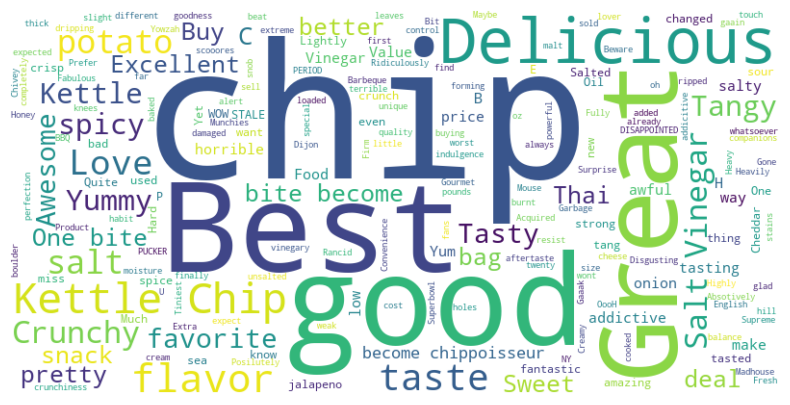

In [22]:
# Combine all tokens into a single string for the word cloud
all_words = ' '.join([' '.join(tokens) for tokens in word_tokens_product1])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

#### analysing the lowest scored and most reviewed product

In [23]:
low_score_df = df.loc[df['Score']==1]
low_score_df.sort_values('ProductId')
low_score_df['ProductId'].value_counts()

ProductId
B000G6RYNE    27
B000ER6YO0     7
B001HTKZ5S     6
B000HDMUQ2     4
B001ELL6O8     2
B000IXUISS     2
B000UZMJZO     2
B00469VSJI     2
B000G6MBX2     2
B00813GRG4     1
B004A8QK98     1
B003YXWAF8     1
B001FA1MCO     1
B006CGURWM     1
B000SEJ842     1
B002BCD2OG     1
B006JWQFC0     1
B001LO4ZWI     1
B001EPPE42     1
B005MZIJBU     1
B002GUWBMC     1
B0018DQFPC     1
B000UWSQT0     1
B000S806VM     1
B00448SNSA     1
B0041QJSJS     1
B007DJ0O9I     1
B0009XLVG0     1
B000JEHAHS     1
B001GVISJM     1
B001EO5QW8     1
B001EO5TPM     1
B0059WXJKM     1
B001EPPI84     1
B0019CW0HE     1
B002HQAXUW     1
B000ITVLE2     1
B007B9J6G2     1
B0064KO0BU     1
B0028C44Z0     1
B0009XLVGA     1
B002TDK0VK     1
B001L4ELRW     1
B003ZFXJDW     1
B0002567IW     1
B0048IC328     1
B00821UN4M     1
B000LKZK7C     1
B001D07IPG     1
B001UJEN6C     1
B003YDP5PA     1
B002X9JNYU     1
B006F2NYI2     1
Name: count, dtype: int64

In [24]:
neg_product_df = low_score_df.loc[low_score_df['ProductId']=='B000G6RYNE']
neg_product_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
508,509,B000G6RYNE,A3I5AT1101AS3A,Nikolette Tripp,1,2,1,1233360000,Maybe the worst chips ever.,These are perhaps the worst chips that have ev...
509,510,B000G6RYNE,A22LENLDTGQIU7,R. Yamaoka,4,7,1,1252713600,Surprise 1 It's different...,"Kettle chips now look, feel and taste like Lay..."
516,517,B000G6RYNE,A38KP1POQ191WT,"Judy Schinske ""Veronica""",0,1,1,1279065600,"I have had better ""Jalapeno Kettle Chips""","These were nasty, they were so greasy and too ..."
528,529,B000G6RYNE,A1BXG0K7UD9CTD,"MicTrik ""mictrik""",20,27,1,1254009600,They changed the Chips now they taste horrible,I once loved these chips and they were the onl...
537,538,B000G6RYNE,A18VDAH788BOAC,Geeb,1,3,1,1331856000,Gone down hill,When originally produced in England these we'...
538,539,B000G6RYNE,A2NI99G9BANORP,cgoldsmith19,1,3,1,1328572800,completely ripped off,after opening numerous bags I found that none ...
541,542,B000G6RYNE,A2TN9C5E4A0I3F,Jimmy,4,8,1,1285632000,STALE. Beware buying these on special!,I've bought these at the local supermarket and...
543,544,B000G6RYNE,A3GJQ3W0T0KWEO,"tatcol ""tatcol""",0,2,1,1328918400,USED to be my favorite chips,"Kettle Brand chips used to be so good...oily, ..."
544,545,B000G6RYNE,A1PGMT8XLL4FPM,TZ1 GUY,0,2,1,1328400000,"Stale, Rancid Oil Taste, And if You Like Even ...",...you can absolutely forget about these. Conf...
545,546,B000G6RYNE,A4XCTURC8URLE,Molly Yarber,0,2,1,1306886400,Disgusting,These chips are nasty. I thought someone had ...


In [25]:
neg_product_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,27.000000,27.000000,27.000000,27.0,2.700000e+01
mean,554.925926,2.851852,5.629630,1.0,1.292691e+09
std,26.593704,4.092241,5.039446,0.0,3.751535e+07
min,509.000000,0.000000,1.000000,1.0,1.215475e+09
25%,543.000000,0.500000,2.000000,1.0,1.267531e+09
50%,555.000000,2.000000,5.000000,1.0,1.297901e+09
75%,562.500000,4.000000,7.000000,1.0,1.328486e+09
max,624.000000,20.000000,27.000000,1.0,1.344038e+09


In [26]:
word_tokens_negproduct=[]
for summary in neg_product_df['Summary']:
    tokens = nltk.word_tokenize(summary)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
    word_tokens_negproduct.append(filtered_tokens)

word_tokens_negproduct

[['Maybe', 'worst', 'chips', 'ever'],
 ['Surprise', '1', 'different'],
 ['better', 'Jalapeno', 'Kettle', 'Chips'],
 ['changed', 'Chips', 'taste', 'horrible'],
 ['Gone', 'hill'],
 ['completely', 'ripped'],
 ['STALE', 'Beware', 'buying', 'special'],
 ['USED', 'favorite', 'chips'],
 ['Stale',
  'Rancid',
  'Oil',
  'Taste',
  'Like',
  'Even',
  'Tiniest',
  'Bit',
  'Salt',
  'Flavor',
  'Chips'],
 ['Disgusting'],
 [],
 ['DISAPPOINTED'],
 ['dripping', 'oil'],
 ['Chips'],
 ['Garbage'],
 ['Madhouse', 'Munchies'],
 ['SOUR'],
 ['AWFUL', 'TASTE'],
 ['Kettle', 'sold', 'chips', 'horrible'],
 ['bags', 'damaged', 'holes', 'stains'],
 ['Kettle', 'Chips', 'Make', 'Great', 'Mouse', 'Food'],
 ['HORRIBLE', 'CANT', 'BELIEVE'],
 ['Kettle', 'Brand', 'Potato', 'Chips', 'New', 'York', 'Cheddar'],
 ['happened', 'recipe', 'changed'],
 ['burns', 'skin', 'lips'],
 ['Expired', 'stock'],
 ['awful', 'SOMETIMES', 'awful']]

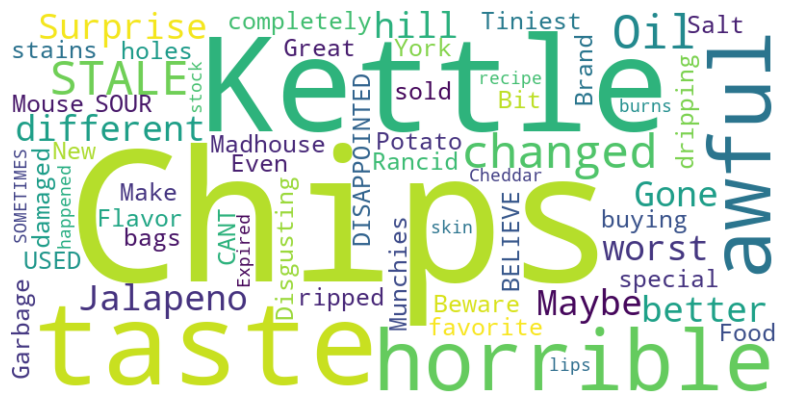

In [27]:
all_words = ' '.join([' '.join(tokens) for tokens in word_tokens_negproduct])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()